# Proyecto 1 - Data analytics - NBA Play-by-play data

Este Cuaderno de Jupyter se centra en explorar y analizar los datos de jugada por jugada de la NBA, que consisten en registros detallados de eventos de partidos de baloncesto. El conjunto de datos contiene 646,367 entradas y abarca varias columnas que capturan diversos aspectos de cada jugada, incluyendo:

* Detalles Temporales: Identificadores de partidos, período y el tiempo del reloj cuando ocurrieron los eventos.
* Puntuación: Puntos anotados por los equipos local y visitante hasta el evento.
* Participantes: Equipos, jugadores e identificadores únicos.
* Tipos de Eventos: Descripciones de los tipos de jugadas, subtipos específicos y resultados.
* Ubicación y Distancia: Coordenadas en la cancha X e Y y distancia al aro.
* Narrativa: Descripciones textuales que proporcionan contexto para cada jugada.
* Información de la Temporada: La temporada de la NBA en la que tuvieron lugar los eventos.

### Objetivos

El objetivo principal de este cuaderno es limpiar, preparar y visualizar los datos para extraer conocimientos significativos sobre las actuaciones de los jugadores, la dinámica del juego y los patrones de puntuación a través de diferentes períodos y temporadas.

Objetivos Clave
1. Limpieza de Datos: Abordar valores faltantes, registros duplicados y corregir formatos de datos, particularmente para el campo 'clock' que registra el tiempo en un formato especializado.
2. Enriquecimiento de Datos: Mejorar el conjunto de datos con campos calculados como los puntos totales y etapas del juego categorizadas (por ejemplo, tiempo regular vs. tiempo extra).
3. Análisis Exploratorio: Utilizar técnicas estadísticas y gráficas para explorar relaciones y patrones en los datos.

### Descripcion de las columnas del dataset

1. gameid: Esta columna almacena un identificador único para cada juego. Este ID se puede usar para referenciar juegos específicos en el conjunto de datos.
2. period: Indica el período del juego durante el cual ocurrió el evento. En la NBA, hay cuatro períodos (cuartos) en un juego regular y períodos adicionales de tiempo extra si son necesarios.
3. clock: Representa el reloj del juego en el momento del evento, típicamente formateado como minutos:segundos (por ejemplo, 02:15 para dos minutos y quince segundos restantes en el período).
4. h_pts: Muestra los puntos totales anotados por el equipo local hasta ese momento en el juego.
5. a_pts: Muestra los puntos totales anotados por el equipo visitante hasta ese momento en el juego.
6. team: El equipo que ejecutó la jugada. Esto podría ser el equipo local o visitante y a menudo se representa por la abreviatura del equipo o la ciudad.
7. playerid: Un identificador único para el jugador involucrado en la jugada. Esto se puede usar para vincular con otras fuentes de datos para obtener información detallada del jugador.
8. player: El nombre del jugador involucrado en la jugada. Esto podría ser para acciones como tiros, faltas, pérdidas de balón, etc.
9. type: La categoría general de la jugada, como tiro, falta, pérdida de balón, rebote, etc.
10. subtype: Detalle más específico sobre el tipo de jugada, por ejemplo, un tiro podría tener subtipos como tiro de tres puntos o clavada.
11. result: El resultado de la jugada, como convertido o fallado para tiros, falta señalada, etc.
12. x: La coordenada x en la cancha donde ocurrió la jugada, típicamente utilizando el sistema de medio campo donde una canasta está en cero y la otra en el extremo opuesto de la escala x.
13. y: La coordenada y en la cancha, proporcionando una medición perpendicular a la coordenada x para localizar precisamente donde ocurrió el evento en la cancha.
14. dist: La distancia al aro donde ocurrió el evento, a menudo relevante para intentos de tiro.
15. desc: Una descripción textual de la jugada, ofreciendo detalles no capturados por los datos estructurados en otras columnas. Esto puede incluir acciones de los jugadores, reacciones y otros elementos notables de la jugada.
16. season: La temporada de la NBA durante la cual se jugó el partido, típicamente formateada como el año de inicio de la temporada (por ejemplo, 2021 para la temporada 2021-2022).

### Preguntas 

1. Cuales son los jugadores con mayor cantidad de tiros exitosos y tiros fallados por periodos

2. Que equipos obtienen mas puntos por periodo? Que variables afectan el patron de puntos anotados a lo largo de un juego?

3. Como varia el rendimiento de los jugadores en diferentes periodos del juego?

4. Que tipos de disparos son los mas efectivos?

5. Que tan efectivos son algunos jugadores al hacer rebound, blocks y asistencias?

6. Como se comparan las contribuciones en defensa con las contribuciones en ofensiva de los equipos?

7. Quienes son los defensores top en la liga?

8. En que posicion del campo ocurren mas jugadas?

In [133]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # regex

In [134]:
# Lectura de archivo csv con el dataset
nba_data = pd.read_csv('data/pbp2023.csv')
print(nba_data.shape)
nba_data.head()

(646367, 16)


,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,season
0,22200001,1,PT12M00.00S,0.0,0.0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),2023
1,22200001,1,PT12M00.00S,NaN,NaN,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,2023
2,22200001,1,PT11M38.00S,NaN,NaN,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,2023
3,22200001,1,PT11M38.00S,NaN,NaN,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),2023
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),2023


In [135]:
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646367 entries, 0 to 646366
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gameid    646367 non-null  int64  
 1   period    646367 non-null  int64  
 2   clock     646367 non-null  object 
 3   h_pts     171676 non-null  float64
 4   a_pts     171676 non-null  float64
 5   team      595095 non-null  object 
 6   playerid  646367 non-null  int64  
 7   player    595852 non-null  object 
 8   type      614903 non-null  object 
 9   subtype   551405 non-null  object 
 10  result    232735 non-null  object 
 11  x         646367 non-null  int64  
 12  y         646367 non-null  int64  
 13  dist      646367 non-null  int64  
 14  desc      646367 non-null  object 
 15  season    646367 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 78.9+ MB


In [136]:
nba_data.describe()

,gameid,period,h_pts,a_pts,playerid,x,y,dist,season
count,6.463670e+05,646367.000000,171676.000000,171676.000000,6.463670e+05,646367.000000,646367.000000,646367.000000,646367.0
mean,2.358362e+07,2.532608,59.968312,58.485152,9.619604e+07,-0.695065,34.103161,4.527672,2023.0
std,5.210566e+06,1.135909,34.694818,34.056075,3.792997e+08,68.013837,72.468474,8.852326,0.0
min,2.220000e+07,1.000000,0.000000,0.000000,0.000000e+00,-249.000000,-52.000000,0.000000,2023.0
25%,2.220033e+07,2.000000,30.000000,29.000000,2.039520e+05,0.000000,0.000000,0.000000,2023.0
50%,2.220066e+07,3.000000,60.000000,58.000000,1.628972e+06,0.000000,0.000000,0.000000,2023.0
75%,2.220099e+07,4.000000,88.000000,86.000000,1.630183e+06,0.000000,19.000000,3.000000,2023.0
max,5.220021e+07,6.000000,175.000000,176.000000,1.610613e+09,250.000000,820.000000,82.000000,2023.0


In [137]:
# Verificar valores unicos de columna 'season'
pd.unique(nba_data['season'])

array([2023])

In [138]:
# Eliminar columna 'season' ya que este dataset solo considera la temporada 2023
nba_data.drop('season',
  axis='columns', inplace=True)
nba_data

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc
0,22200001,1,PT12M00.00S,0.0,0.0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST)
1,22200001,1,PT12M00.00S,NaN,NaN,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris
2,22200001,1,PT11M38.00S,NaN,NaN,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot
3,22200001,1,PT11M38.00S,NaN,NaN,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK)
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646362,52200211,4,PT00M50.80S,NaN,NaN,MIN,1629162,J. McLaughlin,NaN,NaN,NaN,0,0,0,McLaughlin STEAL (1 STL)
646363,52200211,4,PT00M47.50S,NaN,NaN,MIN,1630233,N. Knight,Turnover,Traveling,NaN,0,0,0,Knight Traveling Turnover (P2.T16)
646364,52200211,4,PT00M37.70S,120.0,95.0,OKC,1631172,O. Dieng,Made Shot,Driving Layup Shot,Made,6,13,1,Dieng 1' Driving Layup (4 PTS) (Mann 1 AST)
646365,52200211,4,PT00M13.60S,NaN,NaN,NaN,1610612750,NaN,Turnover,Shot Clock Turnover,NaN,0,0,0,TIMBERWOLVES Turnover: Shot Clock (T#17)


In [139]:
# Manejo de valores faltantes
# Comencemos examinando las columnas con una cantidad significativa de valores faltantes
# missing_data = nba_data.isnull().sum()
# print(missing_data[missing_data > 0])

In [140]:
# Para 'h_pts' y 'a_pts' que son float64, podemos llenar los valores faltantes con 0,
# asumiendo que no se anotó o que no se registró el puntaje en ese momento del evento.
# nba_data['h_pts'].fillna(0, inplace=True)
# nba_data['a_pts'].fillna(0, inplace=True)

In [141]:
# Verificar y mostrar duplicados
duplicates = nba_data[nba_data.duplicated(keep=False)]
print("Registros duplicados:")
duplicates.head()

Registros duplicados:


,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc
23928,22200047,3,PT04M53.00S,NaN,NaN,NaN,1628210,NaN,Foul,Technical,NaN,0,0,0,Joe Mazzulla Foul:T.FOUL (M.Davis)
23930,22200047,3,PT04M53.00S,NaN,NaN,NaN,1628210,NaN,Foul,Technical,NaN,0,0,0,Joe Mazzulla Foul:T.FOUL (M.Davis)
25138,22200049,4,PT01M28.00S,NaN,NaN,NaN,1610612763,NaN,Rebound,Unknown,NaN,0,0,0,GRIZZLIES Rebound
25140,22200049,4,PT01M28.00S,NaN,NaN,NaN,1610612763,NaN,Rebound,Unknown,NaN,0,0,0,GRIZZLIES Rebound
30447,22200060,3,PT04M24.00S,NaN,NaN,NaN,959,S. Nash,Foul,Technical,NaN,0,0,0,Steve Nash Foul:T.FOUL (J.Tiven)


In [142]:
# Eliminar si hay duplicados
duplicates = nba_data.duplicated().sum()
print(f"Número de entradas duplicadas: {duplicates}")
# Si decides eliminar duplicados
if duplicates > 0:
    nba_data = nba_data.drop_duplicates()

Número de entradas duplicadas: 169


In [143]:
# Convertir el formato de 'clock' de PT12M00.00S a minutos y segundos
# Extraemos los minutos y los segundos usando expresiones regulares

def parse_time(time_str):
    match = re.match(r'PT(\d+)M(\d+)\.\d+S', time_str)
    if match:
        return int(match.group(1)), int(match.group(2))
    return np.nan, np.nan  # Retorna NaN si no hay coincidencia

# Primero, aseguremos que estamos trabajando con un Dataframe completo, no un slice
nba_data = nba_data.copy()
# Aplicar la función para crear las columnas de minutos y segundos
nba_data['minutes'], nba_data['seconds'] = zip(*nba_data['clock'].apply(parse_time))

nba_data.head()

In [144]:
# Crear una nueva característica para puntos totales si es necesario
nba_data['total_pts'] = nba_data['h_pts'] + nba_data['a_pts']
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts
0,22200001,1,PT12M00.00S,0.0,0.0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0.0
1,22200001,1,PT12M00.00S,NaN,NaN,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,NaN
2,22200001,1,PT11M38.00S,NaN,NaN,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,NaN
3,22200001,1,PT11M38.00S,NaN,NaN,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,NaN
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,NaN


In [145]:
# Crear una columna categórica para períodos para manejar tiempos extras de manera distinta
nba_data['game_stage'] = np.where(nba_data['period'] <= 4, 'Regular', 'Overtime')
nba_data.head()

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage
0,22200001,1,PT12M00.00S,0.0,0.0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0.0,Regular
1,22200001,1,PT12M00.00S,NaN,NaN,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,NaN,Regular
2,22200001,1,PT11M38.00S,NaN,NaN,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,NaN,Regular
3,22200001,1,PT11M38.00S,NaN,NaN,BOS,1627759,J. Brown,NaN,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,NaN,Regular
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,NaN,Regular


In [146]:
# verificar si hay valores unicos en columna 'type'
unique_values = np.unique(nba_data['type'].astype(str))
unique_values

array(['Ejection', 'Foul', 'Foul                                    ',
       'Free Throw', 'Instant Replay',
       'Instant Replay                          ', 'Jump Ball',
       'Made Shot', 'Missed Shot', 'Rebound', 'Substitution', 'Timeout',
       'Turnover', 'Turnover                                ',
       'Violation', 'nan', 'period'], dtype=object)

In [147]:
# Eliminar espacios al principio y al final de las cadenas en la columna 'type'
nba_data['type'] = nba_data['type'].str.strip()

In [148]:
# verificar nuevamente si hay valores unicos en columna 'type'
unique_values = np.unique(nba_data['type'].astype(str))
unique_values

array(['Ejection', 'Foul', 'Free Throw', 'Instant Replay', 'Jump Ball',
       'Made Shot', 'Missed Shot', 'Rebound', 'Substitution', 'Timeout',
       'Turnover', 'Violation', 'nan', 'period'], dtype=object)

/tmp/ipykernel_13/665901613.py:13: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue=col, legend=False, data=filtered_data, ax=ax[i], order=top_categories,
/tmp/ipykernel_13/665901613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_13/665901613.py:13: UserWarning: 
The palette list has fewer values (2) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, hue=col, legend=False, data=filtered_data, ax=ax[i], order=top_categories,
/tmp/ipykernel_13/665901613.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
/tmp/ipykernel_13/665901613.

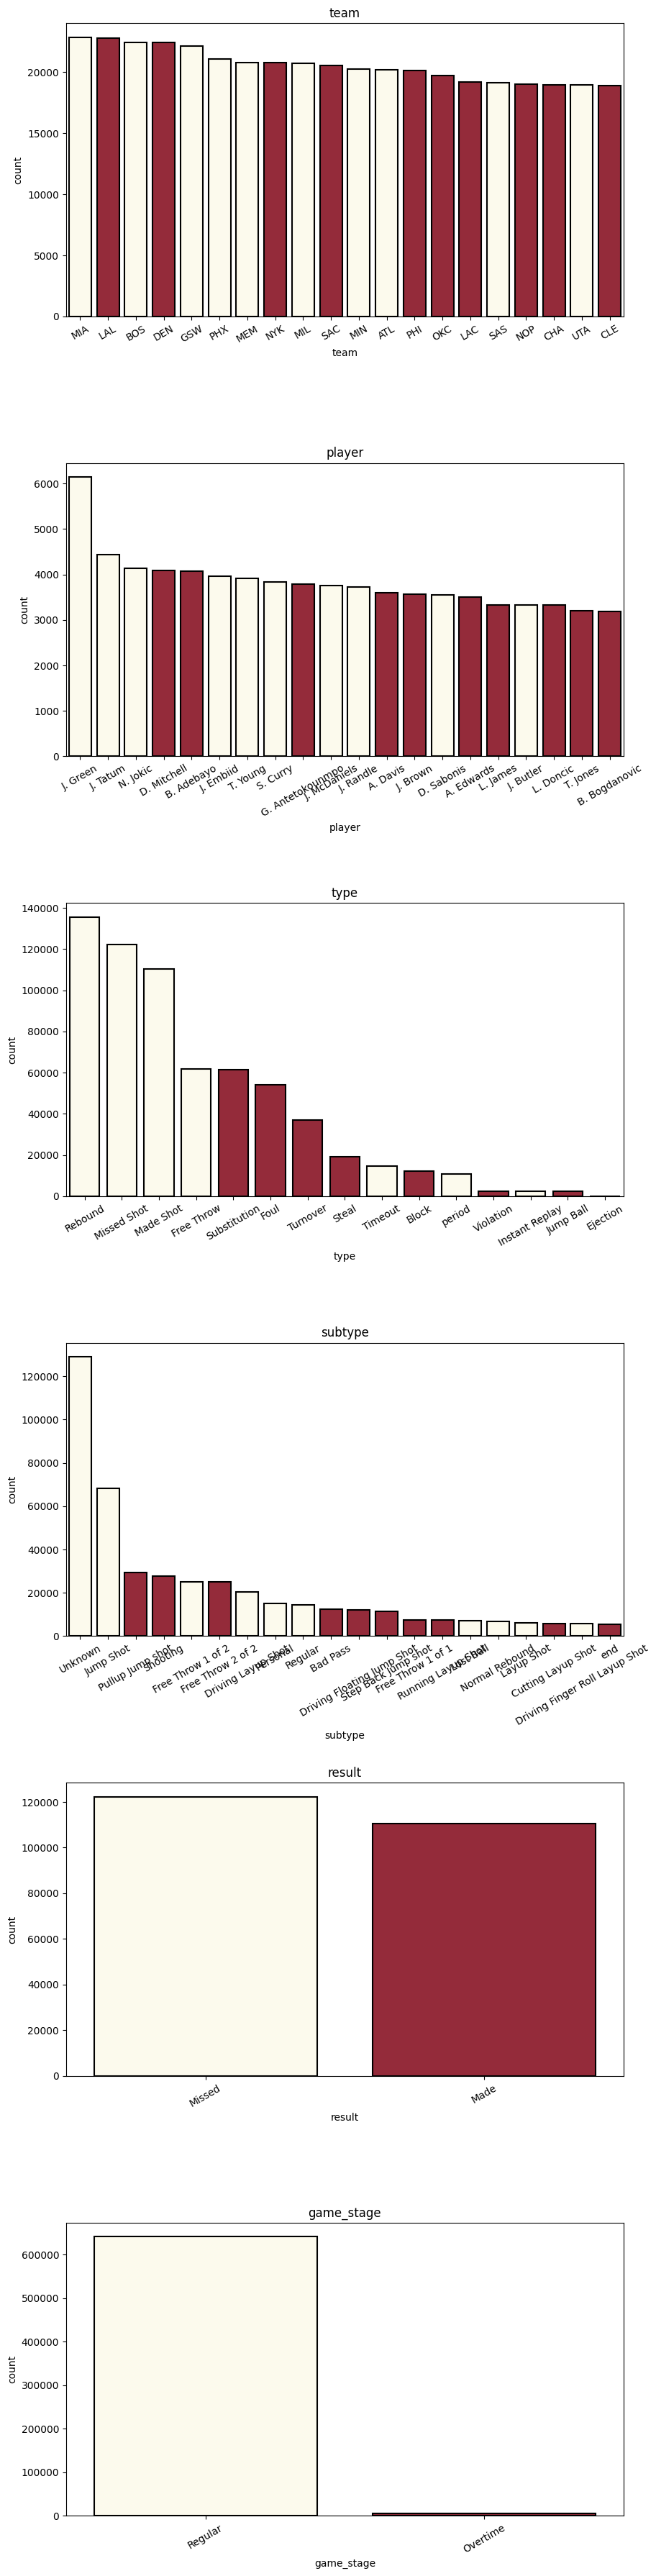

In [157]:
# Tomemos las variables categóricas y generemos gráficos de barras
col_cat = ['team', 'player', 'type', 'subtype', 'result', 'game_stage']
# Separacion de los graficos
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10, 45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
    # Obtener el conteo de valores unicos de los 20 primeros del top
    top_categories = nba_data[col].value_counts().head(20).index
    # Filtrar la data que incluya las categorias top
    filtered_data = nba_data[nba_data[col].isin(top_categories)]
    # Crear el grafico de barras de conteo
    sns.countplot(x=col, hue=col, legend=False, data=filtered_data, ax=ax[i], order=top_categories, 
                  palette=['#FEFCEB','#A6192E'], linewidth=1.5, edgecolor='black')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

In [150]:
# Para datos categóricos como 'team', 'player', 'type', 'subtype', y 'result', 
# podríamos llenar los valores faltantes con un marcador como 'Desconocido' o usar una estrategia de modo
# nba_data['team'].fillna('Unknown', inplace=True)
# nba_data['player'].fillna('Unknown', inplace=True)
# nba_data['type'].fillna('Unknown', inplace=True)
# nba_data['subtype'].fillna('Unknown', inplace=True)

Para valores en columna 'desc' que tengan el formato 'Brown BLOCK (1 BLK)'

In [151]:
# Actualizar la columna 'type' si es que la columna 'desc' contiene la palabra 'BLOCK'

nba_data['type'] = nba_data.apply(lambda row: 'Block' if 'BLOCK' in row['desc'] else row['type'], axis=1)
nba_data.head(10)

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage
0,22200001,1,PT12M00.00S,0.0,0.0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0.0,Regular
1,22200001,1,PT12M00.00S,NaN,NaN,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,NaN,Regular
2,22200001,1,PT11M38.00S,NaN,NaN,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,NaN,Regular
3,22200001,1,PT11M38.00S,NaN,NaN,BOS,1627759,J. Brown,Block,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,NaN,Regular
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,NaN,Regular
5,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Turnover,Out of Bounds Lost Ball Turnover,NaN,0,0,0,Tucker Out of Bounds Lost Ball Turnover (P1.T1),11,35,NaN,Regular
6,22200001,1,PT11M15.00S,2.0,0.0,BOS,203935,M. Smart,Made Shot,Driving Floating Bank Jump Shot,Made,120,55,13,Smart 13' Driving Floating Bank Jump Shot (2 PTS),11,15,2.0,Regular
7,22200001,1,PT11M05.00S,NaN,NaN,PHI,202699,T. Harris,Missed Shot,Driving Floating Jump Shot,Missed,50,135,14,MISS Harris 14' Driving Floating Jump Shot,11,5,NaN,Regular
8,22200001,1,PT11M05.00S,NaN,NaN,PHI,202699,T. Harris,Rebound,Unknown,NaN,0,0,0,Harris REBOUND (Off:1 Def:0),11,5,NaN,Regular
9,22200001,1,PT11M03.00S,2.0,2.0,PHI,202699,T. Harris,Made Shot,Tip Layup Shot,Made,0,0,0,Harris Tip Layup Shot (2 PTS),11,3,4.0,Regular


In [152]:
# Extrae el numero de la columna 'desc' si contiene la palabra 'BLOCK'
def extract_block_number(desc):
    if 'BLOCK' in desc:
        # Busca uno o mas digitos dentro del parentesis despues de 'BLOCK'
        match = re.search(r'BLOCK \((\d+) BLK\)', desc)
        if match:
            return int(match.group(1))
    return 0

# Aplicar la funcion para crear una columna 'block_number'
nba_data['block_number'] = nba_data['desc'].apply(extract_block_number)

nba_data

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,result,x,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number
0,22200001,1,PT12M00.00S,0.0,0.0,NaN,0,NaN,period,start,NaN,0,0,0,Start of 1st Period (7:36 PM EST),12,0,0.0,Regular,0
1,22200001,1,PT12M00.00S,NaN,NaN,BOS,201143,A. Horford,Jump Ball,NaN,NaN,0,0,0,Jump Ball Horford vs. Embiid: Tip to Harris,12,0,NaN,Regular,0
2,22200001,1,PT11M38.00S,NaN,NaN,PHI,203954,J. Embiid,Missed Shot,Turnaround Fadeaway shot,Missed,-118,50,13,MISS Embiid 13' Turnaround Fadeaway Shot,11,38,NaN,Regular,0
3,22200001,1,PT11M38.00S,NaN,NaN,BOS,1627759,J. Brown,Block,NaN,NaN,0,0,0,Brown BLOCK (1 BLK),11,38,NaN,Regular,1
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,NaN,0,0,0,Tucker REBOUND (Off:1 Def:0),11,35,NaN,Regular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646362,52200211,4,PT00M50.80S,NaN,NaN,MIN,1629162,J. McLaughlin,NaN,NaN,NaN,0,0,0,McLaughlin STEAL (1 STL),0,50,NaN,Regular,0
646363,52200211,4,PT00M47.50S,NaN,NaN,MIN,1630233,N. Knight,Turnover,Traveling,NaN,0,0,0,Knight Traveling Turnover (P2.T16),0,47,NaN,Regular,0
646364,52200211,4,PT00M37.70S,120.0,95.0,OKC,1631172,O. Dieng,Made Shot,Driving Layup Shot,Made,6,13,1,Dieng 1' Driving Layup (4 PTS) (Mann 1 AST),0,37,215.0,Regular,0
646365,52200211,4,PT00M13.60S,NaN,NaN,NaN,1610612750,NaN,Turnover,Shot Clock Turnover,NaN,0,0,0,TIMBERWOLVES Turnover: Shot Clock (T#17),0,13,NaN,Regular,0


Para valores en columna 'desc' que tengan el formato 'Tatum REBOUND (Off:0 Def:1)'

In [153]:
def extract_rebounds(desc):
    if 'REBOUND' in desc:
        # Buscar los patrones "Off:x" y "Def:y"
        off_match = re.search(r'Off:(\d+)', desc)
        def_match = re.search(r'Def:(\d+)', desc)
        # Extraer rebounds off y def si se encuentran coincidencias
        off_rebounds = int(off_match.group(1)) if off_match else 0
        def_rebounds = int(def_match.group(1)) if def_match else 0
        return off_rebounds, def_rebounds
    return 0, 0

# Aplicar la funcion a la columna 'desc' y crear dos nuevas columnas
nba_data['off_rebounds'], nba_data['def_rebounds'] = zip(*nba_data['desc'].apply(extract_rebounds))

nba_data[nba_data['type'] == 'Rebound']

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,...,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds
4,22200001,1,PT11M35.00S,NaN,NaN,PHI,200782,P. Tucker,Rebound,Unknown,...,0,0,Tucker REBOUND (Off:1 Def:0),11,35,NaN,Regular,0,1,0
8,22200001,1,PT11M05.00S,NaN,NaN,PHI,202699,T. Harris,Rebound,Unknown,...,0,0,Harris REBOUND (Off:1 Def:0),11,5,NaN,Regular,0,1,0
12,22200001,1,PT10M31.00S,NaN,NaN,BOS,1628369,J. Tatum,Rebound,Unknown,...,0,0,Tatum REBOUND (Off:0 Def:1),10,31,NaN,Regular,0,0,1
18,22200001,1,PT10M12.00S,NaN,NaN,NaN,1610612755,NaN,Rebound,Unknown,...,0,0,76ers Rebound,10,12,NaN,Regular,0,0,0
20,22200001,1,PT10M07.00S,NaN,NaN,BOS,201143,A. Horford,Rebound,Unknown,...,0,0,Horford REBOUND (Off:0 Def:1),10,7,NaN,Regular,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646331,52200211,4,PT04M15.00S,NaN,NaN,OKC,1630544,T. Mann,Rebound,Unknown,...,0,0,Mann REBOUND (Off:0 Def:1),4,15,NaN,Regular,0,0,1
646335,52200211,4,PT04M01.00S,NaN,NaN,OKC,1630526,J. Robinson-Earl,Rebound,Unknown,...,0,0,Robinson-Earl REBOUND (Off:0 Def:1),4,1,NaN,Regular,0,0,1
646337,52200211,4,PT03M53.00S,NaN,NaN,MIN,203497,R. Gobert,Rebound,Unknown,...,0,0,Gobert REBOUND (Off:4 Def:6),3,53,NaN,Regular,0,4,6
646344,52200211,4,PT03M27.00S,NaN,NaN,MIN,1630233,N. Knight,Rebound,Unknown,...,0,0,Knight REBOUND (Off:0 Def:1),3,27,NaN,Regular,0,0,1


Para valores en columna 'desc' que tengan el formato 'Knight STEAL (1 STL)'

In [154]:
nba_data['type'] = nba_data.apply(lambda row: 'Steal' if 'STEAL' in row['desc'] else row['type'], axis=1)
nba_data[nba_data['type'] == 'Steal']

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,...,y,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds
28,22200001,1,PT09M47.00S,NaN,NaN,BOS,203935,M. Smart,Steal,NaN,...,0,0,Smart STEAL (1 STL),9,47,NaN,Regular,0,0,0
58,22200001,1,PT07M35.00S,NaN,NaN,PHI,202699,T. Harris,Steal,NaN,...,0,0,Harris STEAL (1 STL),7,35,NaN,Regular,0,0,0
71,22200001,1,PT06M14.00S,NaN,NaN,PHI,1630178,T. Maxey,Steal,NaN,...,0,0,Maxey STEAL (1 STL),6,14,NaN,Regular,0,0,0
84,22200001,1,PT04M47.00S,NaN,NaN,BOS,1627763,M. Brogdon,Steal,NaN,...,0,0,Brogdon STEAL (1 STL),4,47,NaN,Regular,0,0,0
124,22200001,1,PT01M42.00S,NaN,NaN,PHI,1629001,D. Melton,Steal,NaN,...,0,0,Melton STEAL (1 STL),1,42,NaN,Regular,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646291,52200211,4,PT08M01.00S,NaN,NaN,OKC,1631114,J. Williams,Steal,NaN,...,0,0,Jal. Williams STEAL (3 STL),8,1,NaN,Regular,0,0,0
646293,52200211,4,PT07M55.00S,NaN,NaN,MIN,201144,M. Conley,Steal,NaN,...,0,0,Conley STEAL (3 STL),7,55,NaN,Regular,0,0,0
646333,52200211,4,PT04M08.00S,NaN,NaN,MIN,1627752,T. Prince,Steal,NaN,...,0,0,Prince STEAL (1 STL),4,8,NaN,Regular,0,0,0
646357,52200211,4,PT01M15.00S,NaN,NaN,MIN,1630233,N. Knight,Steal,NaN,...,0,0,Knight STEAL (1 STL),1,15,NaN,Regular,0,0,0


In [155]:
# Extrae el numero de la columna 'desc' si contiene la palabra 'STEAL'
def extract_steal_number(desc):
    if 'STEAL' in desc:
        # Busca uno o mas digitos dentro del parentesis despues de 'STEAL'
        match = re.search(r'STEAL \((\d+) STL\)', desc)
        if match:
            return int(match.group(1))
    return 0

# Aplicar la funcion para crear una columna 'steal_number'
nba_data['steal_number'] = nba_data['desc'].apply(extract_steal_number)

nba_data[nba_data['type'] == 'Steal']

,gameid,period,clock,h_pts,a_pts,team,playerid,player,type,subtype,...,dist,desc,minutes,seconds,total_pts,game_stage,block_number,off_rebounds,def_rebounds,steal_number
28,22200001,1,PT09M47.00S,NaN,NaN,BOS,203935,M. Smart,Steal,NaN,...,0,Smart STEAL (1 STL),9,47,NaN,Regular,0,0,0,1
58,22200001,1,PT07M35.00S,NaN,NaN,PHI,202699,T. Harris,Steal,NaN,...,0,Harris STEAL (1 STL),7,35,NaN,Regular,0,0,0,1
71,22200001,1,PT06M14.00S,NaN,NaN,PHI,1630178,T. Maxey,Steal,NaN,...,0,Maxey STEAL (1 STL),6,14,NaN,Regular,0,0,0,1
84,22200001,1,PT04M47.00S,NaN,NaN,BOS,1627763,M. Brogdon,Steal,NaN,...,0,Brogdon STEAL (1 STL),4,47,NaN,Regular,0,0,0,1
124,22200001,1,PT01M42.00S,NaN,NaN,PHI,1629001,D. Melton,Steal,NaN,...,0,Melton STEAL (1 STL),1,42,NaN,Regular,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646291,52200211,4,PT08M01.00S,NaN,NaN,OKC,1631114,J. Williams,Steal,NaN,...,0,Jal. Williams STEAL (3 STL),8,1,NaN,Regular,0,0,0,3
646293,52200211,4,PT07M55.00S,NaN,NaN,MIN,201144,M. Conley,Steal,NaN,...,0,Conley STEAL (3 STL),7,55,NaN,Regular,0,0,0,3
646333,52200211,4,PT04M08.00S,NaN,NaN,MIN,1627752,T. Prince,Steal,NaN,...,0,Prince STEAL (1 STL),4,8,NaN,Regular,0,0,0,1
646357,52200211,4,PT01M15.00S,NaN,NaN,MIN,1630233,N. Knight,Steal,NaN,...,0,Knight STEAL (1 STL),1,15,NaN,Regular,0,0,0,1
